TABULOR MODEL FRON SCRATCH

In [4]:
%pip install torch numpy pandas fastai

Note: you may need to restart the kernel to use updated packages.


Cleaning the data

In [5]:
import pandas as pd

df = pd.read_csv('./Titanic/train.csv')
df



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
modes = df.mode().iloc[0]

In [8]:
df.fillna(modes, inplace=True)

In [9]:
import numpy as np
df.describe(include=(np.number))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

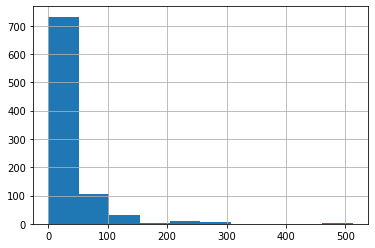

In [10]:
df['Fare'].hist()

In [11]:
df['LogFare'] = np.log1p(df['Fare'])

<AxesSubplot:>

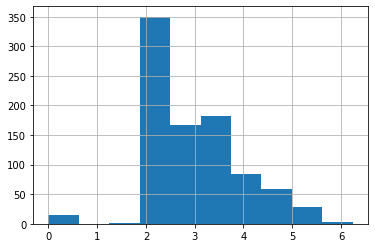

In [12]:
df['LogFare'].hist()

In [13]:
pclasses = sorted(df.Pclass.unique())
pclasses

[1, 2, 3]

In [14]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,691,646


In [15]:
df = pd.get_dummies(df,columns=["Sex","Pclass","Embarked"])
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'LogFare', 'Sex_female', 'Sex_male', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [16]:
import torch
from torch import tensor

t_dep = tensor(df.Survived)
added_cols= ['Sex_male','Sex_female','Pclass_1','Pclass_2','Pclass_3','Embarked_C','Embarked_Q','Embarked_S']
indep_cols = ['Age','SibSp','Parch','LogFare'] + added_cols
t_indep = tensor(df[indep_cols].values, dtype=torch.float32)
t_indep.shape
df[indep_cols].isna().sum()

Age           0
SibSp         0
Parch         0
LogFare       0
Sex_male      0
Sex_female    0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [17]:
torch.manual_seed(442)

n_coeff = t_indep.shape[1]
coeffs = torch.randn(n_coeff) - 0.5
coeffs * t_indep

tensor([[-25.5964,   1.6909,   0.0000,  ...,  -0.0000,  -0.0000,  -1.3082],
        [-44.2120,   1.6909,   0.0000,  ...,  -0.7084,  -0.0000,  -0.0000],
        [-30.2503,   0.0000,   0.0000,  ...,  -0.0000,  -0.0000,  -1.3082],
        ...,
        [-27.9234,   1.6909,   2.3814,  ...,  -0.0000,  -0.0000,  -1.3082],
        [-30.2503,   0.0000,   0.0000,  ...,  -0.7084,  -0.0000,  -0.0000],
        [-37.2312,   0.0000,   0.0000,  ...,  -0.0000,  -2.1337,  -0.0000]])

In [18]:
## Divise by max to normalize value
vals,indices = t_indep.max(dim=0)
t_indep = t_indep / vals
t_indep * coeffs

tensor([[-0.3200,  0.2114,  0.0000,  ..., -0.0000, -0.0000, -1.3082],
        [-0.5527,  0.2114,  0.0000,  ..., -0.7084, -0.0000, -0.0000],
        [-0.3781,  0.0000,  0.0000,  ..., -0.0000, -0.0000, -1.3082],
        ...,
        [-0.3490,  0.2114,  0.3969,  ..., -0.0000, -0.0000, -1.3082],
        [-0.3781,  0.0000,  0.0000,  ..., -0.7084, -0.0000, -0.0000],
        [-0.4654,  0.0000,  0.0000,  ..., -0.0000, -2.1337, -0.0000]])

In [19]:
preds = (t_indep * coeffs).sum(axis=1)
preds[:10]

tensor([-3.9053, -2.1869, -2.7910, -2.6582, -4.3328, -5.0112, -4.5460, -3.2816,
        -2.4986, -0.8140])

In [20]:
loss = torch.abs(preds - t_dep).mean()
loss

tensor(3.7009)

In [21]:
def calc_preds(coeffs,indeps): return (indeps * coeffs).sum(axis=1)
def calc_loss(coeffs,indeps,dep): return torch.abs(calc_preds(coeffs,indeps) - dep).mean()

In [22]:
coeffs.requires_grad_()

tensor([-1.1635,  1.6909,  1.1907, -1.8283, -0.3960,  1.0108, -0.8941, -0.1175,
        -1.4742, -0.7084, -2.1337, -1.3082], requires_grad=True)

In [23]:
loss = calc_loss(coeffs,t_indep,t_dep)
loss

tensor(3.7009, grad_fn=<MeanBackward0>)

In [24]:
loss.backward()

In [25]:
coeffs.grad

tensor([-0.3571, -0.0654, -0.0636, -0.4746, -0.6476, -0.3524, -0.2424, -0.2065,
        -0.5511, -0.1886, -0.0864, -0.7250])

In [26]:
with torch.no_grad():
    coeffs.sub_(coeffs.grad * 0.1)
    print(calc_loss(coeffs,t_indep,t_dep))

tensor(3.5131)


In [27]:
from fastai.data.transforms import RandomSplitter
trn_split,val_split=RandomSplitter(seed=42)(df)

trn_indep,val_indep = t_indep[trn_split],t_indep[val_split]

In [49]:
trn_indep,val_indep = t_indep[trn_split],t_indep[val_split]
trn_dep,val_dep = t_dep[trn_split],t_dep[val_split]
len(trn_indep),len(val_indep)

(713, 178)

In [29]:
def update_coeffs(coeffs,lr): coeffs.data.sub_(coeffs.grad * lr)

In [30]:
def one_epoch(coeffs,lr):
    preds = calc_preds(coeffs,trn_indep)
    loss = torch.abs(preds - trn_dep).mean()
    loss.backward()
    with torch.no_grad():
        update_coeffs(coeffs,lr)
    print(f"{loss:.4f}",end='; ')

In [31]:
def init_coeffs(): return (torch.randn(n_coeff) - 0.5).requires_grad_()

In [32]:
def train_model(epochs=30,lr=0.01):

    coeffs = init_coeffs()
    for i in range(epochs):
        one_epoch(coeffs,lr)
    return coeffs

In [33]:
coeffs = train_model(100,lr=0.02)
coeffs

1.9118; 1.8847; 1.8310; 1.7512; 1.6468; 1.5306; 1.4644; 1.4099; 1.3558; 1.3018; 1.2506; 1.2054; 1.1760; 1.1733; 1.1995; 1.2299; 1.2521; 1.2683; 1.2758; 1.2764; 1.2696; 1.2559; 1.2350; 1.1993; 1.1328; 1.0328; 0.9039; 0.7676; 0.6410; 0.5199; 0.5381; 0.6468; 0.7931; 0.9541; 1.1115; 1.2593; 1.3954; 1.5183; 1.6231; 1.7084; 1.7734; 1.8178; 1.8414; 1.8442; 1.8263; 1.7876; 1.7283; 1.6484; 1.5497; 1.4407; 1.3496; 1.2912; 1.2297; 1.1646; 1.1079; 1.0725; 1.0426; 1.0853; 1.1977; 1.2944; 1.3767; 1.4530; 1.5127; 1.5545; 1.5716; 1.5638; 1.5269; 1.4614; 1.3744; 1.2720; 1.1473; 1.0032; 0.8556; 0.7308; 0.6710; 0.6614; 0.6812; 0.7934; 1.0031; 1.2048; 1.3744; 1.5103; 1.6124; 1.6809; 1.7160; 1.7183; 1.6873; 1.6230; 1.5258; 1.3988; 1.2622; 1.1424; 1.1108; 1.0917; 1.0825; 1.1166; 1.1761; 1.2684; 1.3597; 1.4439; 

tensor([ 0.0293, -0.3925,  0.4931, -0.0509,  1.8811,  0.4062, -0.8292, -1.3257,
         0.3274,  0.5369,  1.4081,  0.1417], requires_grad=True)

In [34]:
def shows_coeffs(): return dict(zip(indep_cols,coeffs.requires_grad_(False)))

shows_coeffs()

{'Age': tensor(0.0293),
 'SibSp': tensor(-0.3925),
 'Parch': tensor(0.4931),
 'LogFare': tensor(-0.0509),
 'Sex_male': tensor(1.8811),
 'Sex_female': tensor(0.4062),
 'Pclass_1': tensor(-0.8292),
 'Pclass_2': tensor(-1.3257),
 'Pclass_3': tensor(0.3274),
 'Embarked_C': tensor(0.5369),
 'Embarked_Q': tensor(1.4081),
 'Embarked_S': tensor(0.1417)}

In [35]:
preds = calc_preds(coeffs,val_indep)
results = val_dep.bool() == (preds > 0.5)
results[:15]

tensor([False, False, False, False, False, False,  True, False, False,  True,
         True,  True,  True,  True, False])

In [36]:
results.float().mean()

tensor(0.2135)

In [37]:
def acc(coeffs): return (val_dep.bool() == (calc_preds(coeffs,val_indep) > 0.5)).float().mean()
acc(coeffs)

tensor(0.2135)

In [38]:
def calc_preds(coeffs,indeps): return torch.sigmoid((indeps * coeffs).sum(axis=1))

In [39]:
coeffs = train_model(150,lr=2)

0.3785; 0.3782; 0.3776; 0.3766; 0.3754; 0.3738; 0.3719; 0.3695; 0.3663; 0.3620; 0.3558; 0.3467; 0.3332; 0.3148; 0.2930; 0.2718; 0.2545; 0.2409; 0.2319; 0.2285; 0.2291; 0.2310; 0.2332; 0.2350; 0.2363; 0.2372; 0.2376; 0.2376; 0.2371; 0.2363; 0.2351; 0.2336; 0.2318; 0.2298; 0.2278; 0.2258; 0.2239; 0.2221; 0.2204; 0.2188; 0.2175; 0.2165; 0.2158; 0.2153; 0.2150; 0.2148; 0.2147; 0.2147; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 0.2146; 

In [40]:
acc(coeffs)

tensor(0.7921)

In [41]:
tst_df = pd.read_csv('./Titanic/test.csv')
tst_df['Fare'] = tst_df.Fare.fillna(0)

In [42]:
tst_df.fillna(modes, inplace=True)
tst_df['LogFare'] = np.log1p(tst_df['Fare'])
tst_df = pd.get_dummies(tst_df,columns=["Sex","Pclass","Embarked"])

tst_indep = tensor(tst_df[indep_cols].values, dtype=torch.float)
tst_indep = tst_indep / vals

In [43]:
tst_df['Survived'] = (calc_preds(coeffs,tst_indep) > 0.5).int()

In [44]:
sub_df = tst_df[['PassengerId','Survived']]
sub_df.to_csv('submission.csv',index=False)

In [45]:
!head submission.csv

PassengerId,Survived
892,0
893,1
894,0
895,0
896,1
897,0
898,1
899,0
900,1


In [60]:

def calc_preds(coeffs,indeps): return torch.sigmoid(indeps@coeffs)


In [57]:
def init_coeffs(): return (torch.rand(n_coeff,1) * 0.1).requires_grad_()

trn_dep = trn_dep[:,None]
val_dep = val_dep[:,None]

In [58]:
val_dep.shape

torch.Size([178, 1])

In [61]:
coeffs = train_model(1000,lr=0.1)

0.5190; 0.5169; 0.5126; 0.5062; 0.4976; 0.4869; 0.4740; 0.4592; 0.4430; 0.4257; 0.4081; 0.3908; 0.3745; 0.3597; 0.3466; 0.3354; 0.3258; 0.3176; 0.3107; 0.3048; 0.2996; 0.2949; 0.2906; 0.2865; 0.2825; 0.2786; 0.2748; 0.2709; 0.2669; 0.2629; 0.2589; 0.2549; 0.2509; 0.2469; 0.2429; 0.2391; 0.2355; 0.2320; 0.2287; 0.2256; 0.2228; 0.2202; 0.2179; 0.2158; 0.2139; 0.2123; 0.2108; 0.2095; 0.2084; 0.2075; 0.2066; 0.2059; 0.2053; 0.2048; 0.2043; 0.2040; 0.2037; 0.2034; 0.2032; 0.2030; 0.2029; 0.2028; 0.2027; 0.2027; 0.2027; 0.2027; 0.2027; 0.2027; 0.2028; 0.2028; 0.2029; 0.2030; 0.2030; 0.2031; 0.2032; 0.2033; 0.2033; 0.2034; 0.2035; 0.2035; 0.2036; 0.2037; 0.2037; 0.2038; 0.2038; 0.2038; 0.2039; 0.2039; 0.2039; 0.2039; 0.2039; 0.2039; 0.2039; 0.2038; 0.2038; 0.2037; 0.2037; 0.2036; 0.2035; 0.2034; 0.2033; 0.2032; 0.2031; 0.2030; 0.2028; 0.2027; 0.2025; 0.2024; 0.2022; 0.2020; 0.2018; 0.2016; 0.2014; 0.2012; 0.2009; 0.2007; 0.2004; 0.2002; 0.1999; 0.1997; 0.1994; 0.1991; 0.1988; 0.1986; 0.1983; 

In [62]:
def init_coeffs(n_hidden=20):
    layer1 = (torch.rand(n_coeff,n_hidden) - 0.5) / n_hidden
    layer2 = torch.rand(n_hidden,1)-0.3
    const = torch.rand(1)[0]
    return layer1.requires_grad_(),layer2.requires_grad_(),const.requires_grad_()

In [64]:
import torch.nn.functional as F

def calc_preds(coeffs,indeps):
    l1,l2,const = coeffs
    res = F.relu(indeps@l1)
    res = res@l2 + const
    return torch.sigmoid(res)

def update_coeffs(coeffs,lr):
    for layer in coeffs:
        layer.sub_(layer.grad * lr)

In [67]:
coeffs = train_model(lr=2)

0.5115; 0.4939; 0.4584; 0.3977; 0.3174; 0.2508; 0.2185; 0.2102; 0.2088; 0.2075; 0.2022; 0.1941; 0.1926; 0.1927; 0.1929; 0.1929; 0.1926; 0.1921; 0.1916; 0.1913; 0.1911; 0.1910; 0.1910; 0.1909; 0.1910; 0.1910; 0.1909; 0.1909; 0.1908; 0.1908; 

In [68]:
acc(coeffs)

tensor(0.8258)

In [108]:
def init_coeffs():
    hiddens= [10,10]
    sizes = [n_coeff] + hiddens + [1]
    n = len(sizes)
    layers = [(torch.rand(sizes[i],sizes[i+1])-0.3) / sizes[i+1]*4 for i in range(n-1)]
    consts = [(torch.rand(1)[0]-0.5)*0.1 for i in range(n-1)]
    for l in layers+consts: l.requires_grad_()
    return layers,consts

In [87]:
def calc_preds(coeffs,indeps):
    layers,consts = coeffs
    n = len(layers)
    res = indeps
    for i,l in enumerate(layers):
        res = res@l + consts[i]
        if i!=n-1: res = F.relu(res)
    return torch.sigmoid(res)

In [112]:
def update_coeffs(coeffs,lr):
    layers,conts = coeffs
    for layer in layers+conts: layer.sub_(layer.grad * lr)

In [133]:
coeffs = train_model(lr=0.0002)

0.5957; 0.5957; 0.5956; 0.5956; 0.5955; 0.5954; 0.5953; 0.5952; 0.5951; 0.5949; 0.5948; 0.5946; 0.5944; 0.5942; 0.5939; 0.5937; 0.5934; 0.5931; 0.5928; 0.5924; 0.5921; 0.5917; 0.5913; 0.5908; 0.5904; 0.5899; 0.5894; 0.5888; 0.5882; 0.5876; 

In [134]:
acc(coeffs)

tensor(0.4045)

FRAMEWORK

In [135]:
df = pd.read_csv('./Titanic/train.csv')

def add_features(df):
    df['LogFare'] = np.log1p(df['Fare'])
    df['Deck'] = df.Cabin.str[0].map(dict(A="ABC",B="ABC",C="ABC",D="DE",E="DE",F="FG",G="FG"))

add_features(df)

In [143]:
splits = RandomSplitter(seed=42)(df)

In [144]:
from fastai.tabular.all import *

dls = TabularPandas(df, splits=splits,
procs=[Categorify,FillMissing,Normalize]
,cat_names=["Sex","Pclass","Embarked","Deck"]
,cont_names=["Age","SibSp","Parch","LogFare"]
,y_names="Survived",y_block=CategoryBlock()
).dataloaders(path=".")

SuggestedLRs(slide=0.10000000149011612, valley=0.015848932787775993)

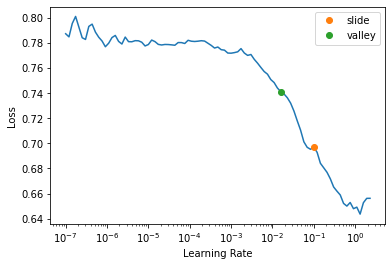

In [145]:
learn = tabular_learner(dls,metrics=accuracy,layers=[10,10])

learn.lr_find(suggest_funcs=(slide,valley))

In [146]:
learn.fit(16,lr=0.03)

epoch,train_loss,valid_loss,accuracy,time
0,0.579032,0.555338,0.735955,00:00
1,0.516914,0.448089,0.831461,00:00
2,0.478896,0.401071,0.831461,00:00
3,0.460798,0.396753,0.814607,00:00
4,0.448416,0.409229,0.820225,00:00
5,0.440547,0.428965,0.797753,00:00
6,0.437497,0.442309,0.808989,00:00
7,0.432818,0.418259,0.825843,00:00
8,0.427402,0.441541,0.803371,00:00
9,0.422583,0.418108,0.808989,00:00


In [157]:
tst_df = pd.read_csv('./Titanic/test.csv')
tst_df["Fare"] = tst_df.Fare.fillna(0)
add_features(tst_df)

tst_dl = learn.dls.test_dl(tst_df)

preds,_ = learn.get_preds(dl=tst_dl)
print(preds)
tst_df['Survived'] = (preds[:,0]>0.5).int()
sub_df = tst_df[['PassengerId','Survived']]
sub_df.to_csv('submission.csv',index=False)

tensor([[0.9241, 0.0759],
        [0.5790, 0.4210],
        [0.9263, 0.0737],
        [0.9091, 0.0909],
        [0.6052, 0.3948],
        [0.8433, 0.1567],
        [0.6003, 0.3997],
        [0.9114, 0.0886],
        [0.6003, 0.3997],
        [0.9123, 0.0877],
        [0.9276, 0.0724],
        [0.7862, 0.2138],
        [0.0147, 0.9853],
        [0.9083, 0.0917],
        [0.0222, 0.9778],
        [0.0737, 0.9263],
        [0.8214, 0.1786],
        [0.7117, 0.2883],
        [0.6003, 0.3997],
        [0.6003, 0.3997],
        [0.7693, 0.2307],
        [0.8173, 0.1827],
        [0.0286, 0.9714],
        [0.3998, 0.6002],
        [0.1716, 0.8284],
        [0.9296, 0.0704],
        [0.0113, 0.9887],
        [0.7469, 0.2531],
        [0.7308, 0.2692],
        [0.9174, 0.0826],
        [0.9099, 0.0901],
        [0.9017, 0.0983],
        [0.6400, 0.3600],
        [0.7096, 0.2904],
        [0.1990, 0.8010],
        [0.6675, 0.3325],
        [0.6003, 0.3997],
        [0.6003, 0.3997],
        [0.9

In [154]:
!tail submission.csv

1300,0
1301,0
1302,0
1303,0
1304,1
1305,1
1306,0
1307,1
1308,1
1309,1
